In [1]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [2]:
pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357270 sha256=eed6d4a30919a811e2ea8f1001102b275983a7763d2034acaf303e2b337fb4f0
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [3]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [5]:
# Step 1: Load Data
import pandas as pd

user_data = pd.read_csv("shein_Users_Dataset.csv")
items_data = pd.read_csv("shein_Products_Dataset.csv")
interactions_data = pd.read_csv("shein_Interactions_Dataset.csv")

print("Data Loaded Successfully!")

Data Loaded Successfully!


In [7]:
# Step 2: Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Handle missing values
user_data.fillna(method='ffill', inplace=True)
interactions_data.fillna(method='ffill', inplace=True)
items_data.fillna(method='ffill', inplace=True)

# Ensure user_id is a string for consistency
user_data['user_id'] = user_data['user_id'].astype(str)
interactions_data['user_id'] = interactions_data['user_id'].astype(str)

# Encode categorical variables
categorical_columns_users = ['gender', 'location']
categorical_columns_items = ['category', 'brand']

encoder_users = OneHotEncoder()
encoded_users = encoder_users.fit_transform(user_data[categorical_columns_users]).toarray()

encoder_items = OneHotEncoder()
encoded_items = encoder_items.fit_transform(items_data[categorical_columns_items]).toarray()
# Ensure no missing values in essential columns
items_data.loc[:, ['product_name', 'category', 'price']] = items_data[['product_name', 'category', 'price']].fillna('Unknown')

# Standardize numerical values
scaler_users = StandardScaler()
user_data[['age', 'spending_score']] = scaler_users.fit_transform(user_data[['age', 'spending_score']])

scaler_items = StandardScaler()
items_data[['price', 'rating']] = scaler_items.fit_transform(items_data[['price', 'rating']])

# Ensure critical columns exist in items_data
required_columns = ['product_name', 'category', 'price']
for col in required_columns:
    if col not in items_data.columns:
        print(f"Missing column '{col}' in items_data, filling with default values.")
        items_data[col] = 'Unknown' if col != 'price' else 0.0


print("Data Preprocessed Successfully!")

Data Preprocessed Successfully!


<ipython-input-7-bb29ae4afa34>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  user_data.fillna(method='ffill', inplace=True)
<ipython-input-7-bb29ae4afa34>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  interactions_data.fillna(method='ffill', inplace=True)
<ipython-input-7-bb29ae4afa34>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  items_data.fillna(method='ffill', inplace=True)


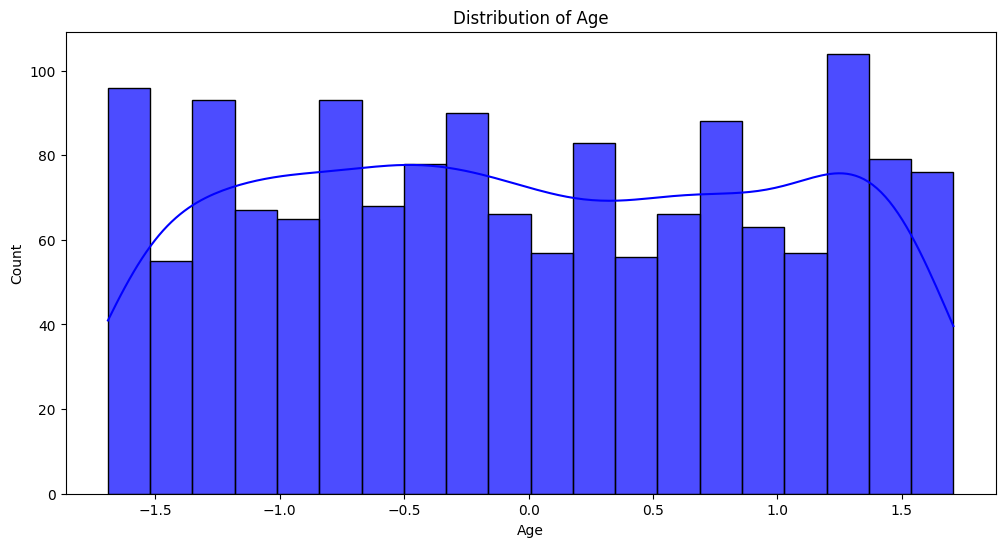

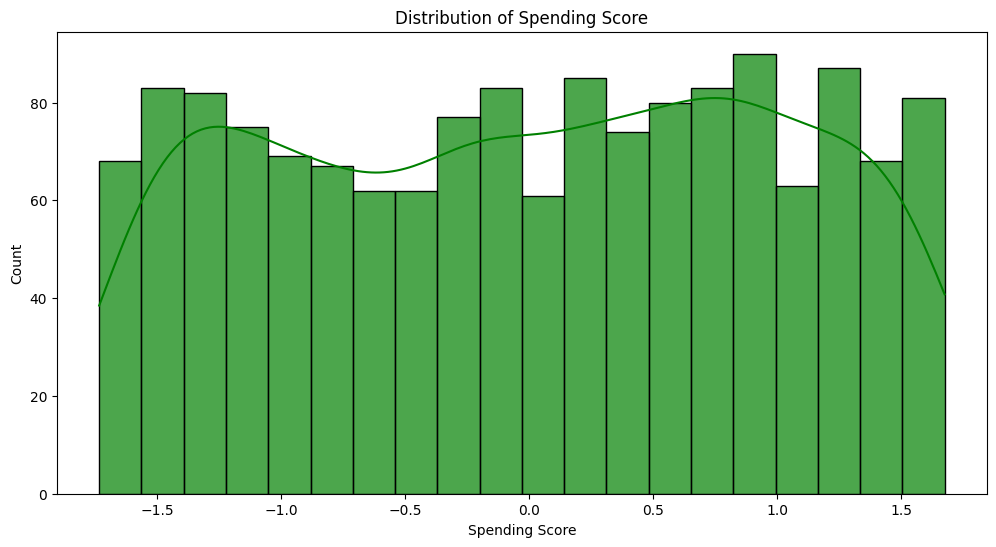

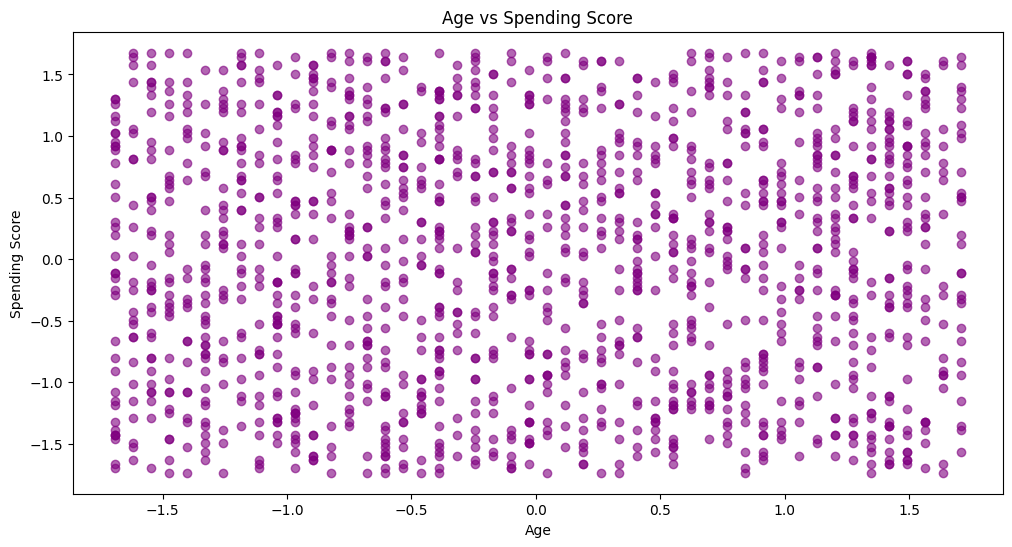

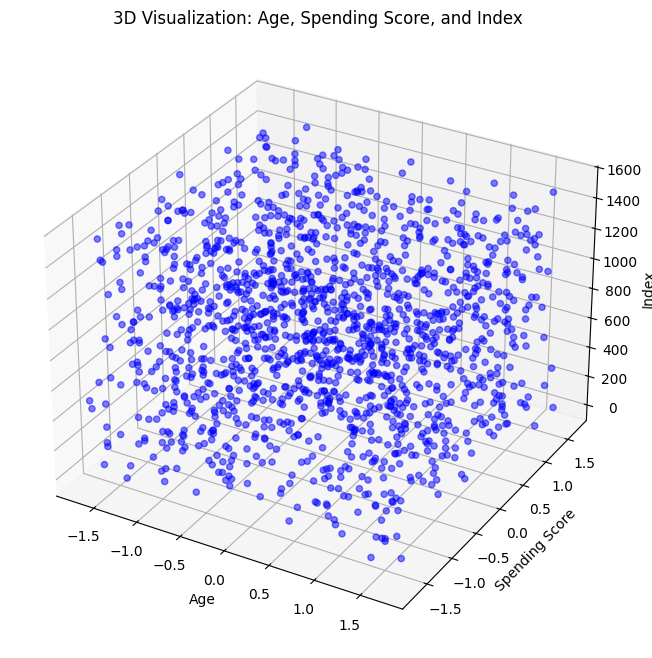

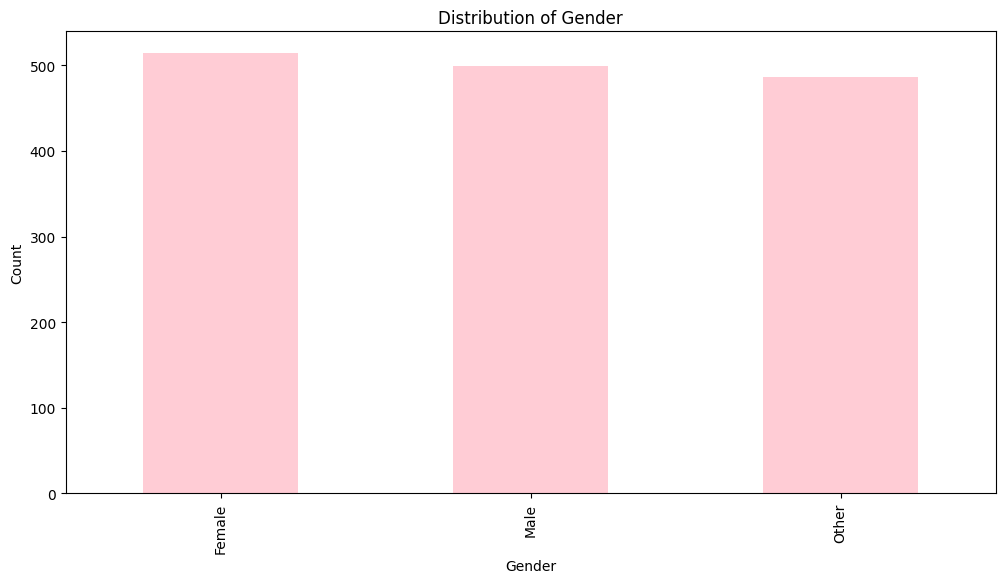

<ipython-input-8-d7214c0bdb94>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=user_data['gender'], y=user_data['spending_score'], palette='coolwarm')


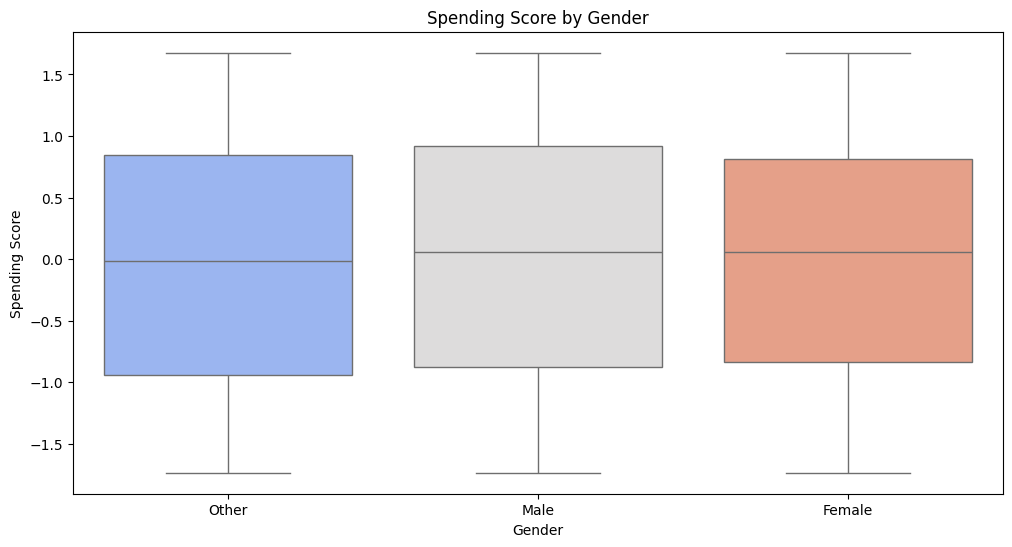

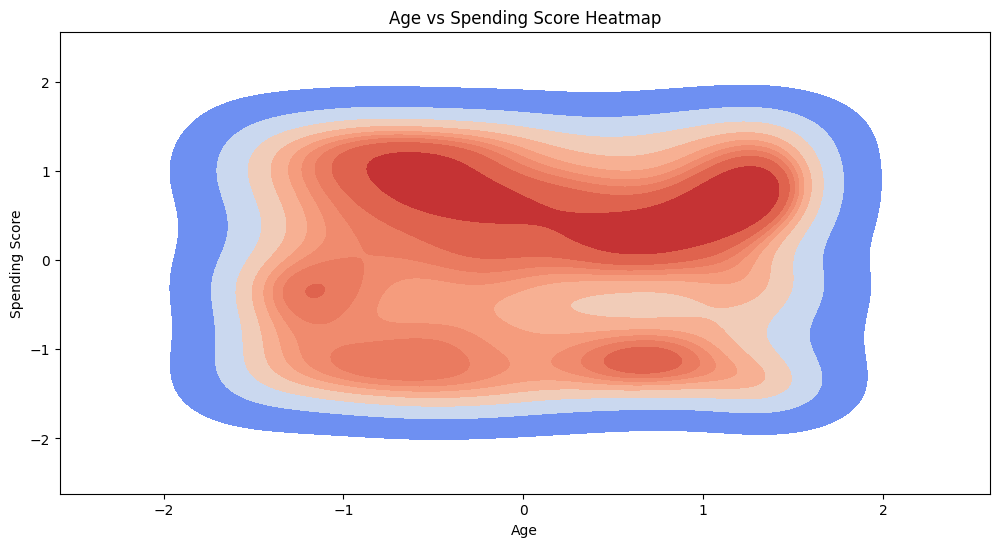

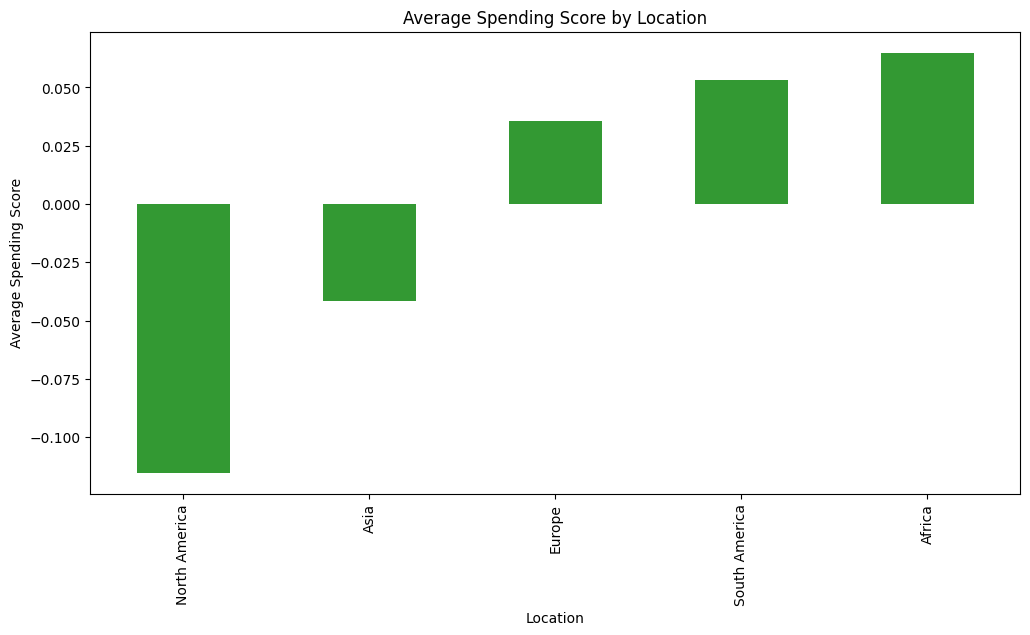

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


<Figure size 1200x800 with 0 Axes>

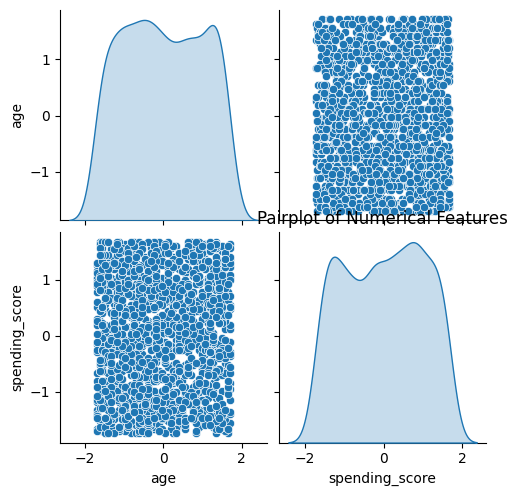

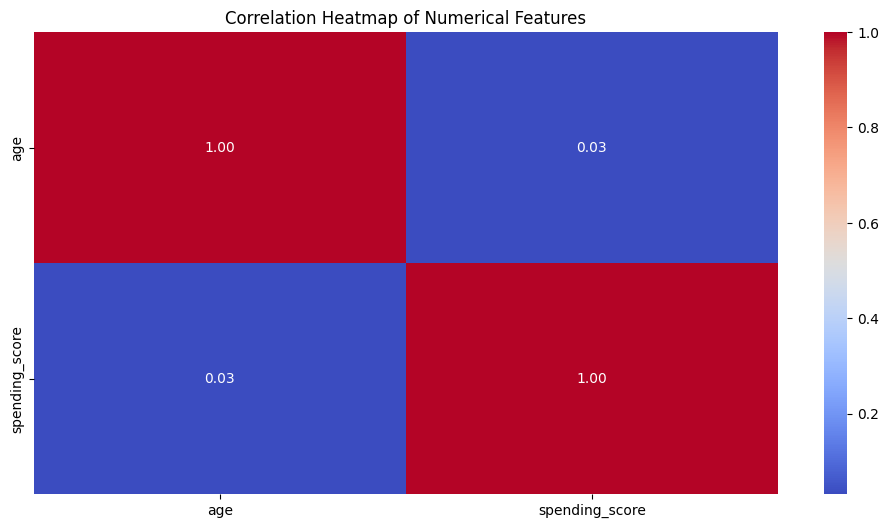

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 1. Distribution of Age
plt.figure(figsize=(12, 6))
sns.histplot(user_data['age'], bins=20, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 2. Spending Score Distribution
plt.figure(figsize=(12, 6))
sns.histplot(user_data['spending_score'], bins=20, kde=True, color='green', alpha=0.7)
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.show()

# 3. Age vs Spending Score Scatter Plot
plt.figure(figsize=(12, 6))
plt.scatter(user_data['age'], user_data['spending_score'], alpha=0.6, color='purple')
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

# 4. 3D Visualization: Age, Spending Score, and Index
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    user_data['age'],
    user_data['spending_score'],
    np.arange(len(user_data)),
    c='blue', alpha=0.5
)
ax.set_title('3D Visualization: Age, Spending Score, and Index')
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Index')
plt.show()

# 5. Gender Distribution
plt.figure(figsize=(12, 6))
user_data['gender'].value_counts().plot(kind='bar', color='pink', alpha=0.8)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 6. Spending Score by Gender
plt.figure(figsize=(12, 6))
sns.boxplot(x=user_data['gender'], y=user_data['spending_score'], palette='coolwarm')
plt.title('Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.show()

# 7. Spending Score and Age Distribution Heatmap
plt.figure(figsize=(12, 6))
sns.kdeplot(
    x=user_data['age'],
    y=user_data['spending_score'],
    cmap='coolwarm',
    fill=True
)
plt.title('Age vs Spending Score Heatmap')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

# 8. Spending Score by Location
plt.figure(figsize=(12, 6))
user_data.groupby('location')['spending_score'].mean().sort_values().plot(kind='bar', color='green', alpha=0.8)
plt.title('Average Spending Score by Location')
plt.xlabel('Location')
plt.ylabel('Average Spending Score')
plt.show()

# 9. Pairplot for Numerical Features
plt.figure(figsize=(12, 8))
sns.pairplot(user_data, vars=['age', 'spending_score'], diag_kind='kde', kind='scatter', palette='husl')
plt.title('Pairplot of Numerical Features')
plt.show()

# 10. Correlation Heatmap
# Select only numeric columns for correlation
numeric_columns = user_data.select_dtypes(include=['number'])

# Compute and plot the correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [9]:
def content_based_recommender(user_id, top_n=5):
    # Check if user_id exists
    if user_id not in user_data['user_id'].values:
        return pd.DataFrame({'Message': ['User ID not found']})

    # Extract user profile
    user_profile = user_data[user_data['user_id'] == user_id]

    # Align categorical columns between users and items
    common_features = [col for col in categorical_columns_users if col in categorical_columns_items]
    if len(common_features) == 0:
        raise ValueError("No matching categorical columns found in user_data and items_data.")

    # Encode user and items with matching features
    user_encoded = encoder_users.transform(user_profile[common_features]).toarray()
    item_features = encoded_items[:, :len(common_features)]

    # Verify dimensions
    if user_encoded.shape[1] != item_features.shape[1]:
        print(f"Dimension mismatch: user_encoded.shape={user_encoded.shape}, item_features.shape={item_features.shape}")
        return pd.DataFrame({'Message': ['Dimension mismatch in features.']})

    # Compute similarity
    similarity_scores = cosine_similarity(user_encoded, item_features)
    top_items_indices = similarity_scores.argsort()[0][-top_n:][::-1]
    return items_data.iloc[top_items_indices]


In [10]:
print(items_data.columns)

Index(['product_id', 'product_name', 'category', 'price', 'brand', 'rating'], dtype='object')


In [11]:
def svd_recommender(user_id, top_n=5):
    reader = Reader(rating_scale=(1, 5))
    svd_data = Dataset.load_from_df(interactions_data[['user_id', 'product_id', 'interaction_value']], reader)
    trainset = svd_data.build_full_trainset()
    model = SVD()
    model.fit(trainset)

    # Check for interactions for the user
    if user_id not in interactions_data['user_id'].values:
        print(f"No interactions found for user: {user_id}")
        return pd.DataFrame({'Message': ['No interactions found for this user.']})

    # Generate predictions for all items
    predictions = []
    for item_id in items_data['product_id']:
        predictions.append((item_id, model.predict(user_id, item_id).est))

    # Sort predictions by estimated rating
    sorted_predictions = sorted(predictions, key=lambda x: x[1], reverse=True)[:top_n]
    recommended_items = [item[0] for item in sorted_predictions]
    return items_data[items_data['product_id'].isin(recommended_items)]


In [13]:
def hybrid_recommender(user_id, top_n=5, alpha=0.5):
    # Check if user_id exists
    if user_id not in user_data['user_id'].values:
        return pd.DataFrame({'Message': ['User ID not found']})

    # Ensure items_data has required columns
    required_columns = ['product_name', 'category', 'price']
    if not all(col in items_data.columns for col in required_columns):
        print(f"Missing required columns in items_data: {set(required_columns) - set(items_data.columns)}")
        return pd.DataFrame({'Message': ['Incomplete item data.']})

    # Get recommendations
    content_recs = content_based_recommender(user_id, top_n)
    svd_recs = svd_recommender(user_id, top_n)

    # Combine recommendations
    combined_recs = pd.concat([content_recs, svd_recs]).drop_duplicates()
    if combined_recs.empty:
        print(f"No recommendations available for user: {user_id}")
        return pd.DataFrame({'Message': ['No recommendations available']})

    return combined_recs[['product_name', 'category', 'price']]


In [15]:
import gradio as gr

def recommend_with_user_selection(user_id):
    try:
        recommendations = hybrid_recommender(user_id, top_n=5)
        if 'Message' in recommendations.columns:
            return [{'Message': recommendations.iloc[0, 0]}]  # Return error message

        return recommendations.to_dict(orient='records')
    except Exception as e:
        print(f"Error: {e}")
        return [{'Message': f"An error occurred: {str(e)}"}]

user_ids = user_data['user_id'].unique().tolist()

gui = gr.Interface(
    fn=recommend_with_user_selection,
    inputs=gr.Dropdown(choices=user_ids, label="Select User ID"),
    outputs=gr.Dataframe(label="Recommended Items"),
    title="Shopping Recommender System",
    description="Select your User ID to receive personalized recommendations.",
)

gui.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0501b171f6f742754a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
